In [81]:
%pylab inline
font = {'size':15, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def fx(x):
    f = log(1.+x) - ( x / (1. + x) )
    return f

def c(cvir, c200):
    q = 2.058
    y = (c200 / cvir) - (fx(c200) / (q * fx(cvir)))**(1./3.)
    return y

2.73249426548


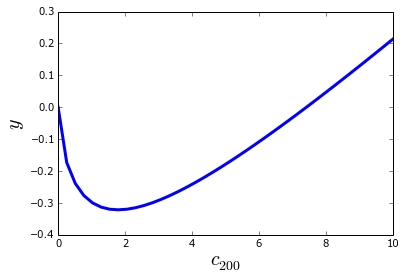

In [3]:
c_test = linspace(0, 10, 40)
plot(c_test, c(10, c_test) ,lw=3)
xlabel('$c_{200}$', fontsize=20)
ylabel('$ y $', fontsize=20)
savefig("c200cvir.png", bbox_inches='tight')
print c(1, 4)

In [14]:
def bissection(cvir):
    min_c200 = 0.1
    max_c200 = cvir
    c_init = 0.5*(min_c200 + max_c200)
    y = c(cvir, c_init)
    while abs(y) > 0.000002:
        #print c_init
        if y>0:
            max_c200 = c_init
        if (y<0) :
            min_c200 = c_init
        c_init = 0.5*(min_c200 + max_c200)
        y = c(cvir, c_init)
    return c_init

In [16]:
c200 = bissection(10)

In [55]:
def m200mvir(c200, cvir):
    x = fx(c200)/fx(cvir)
    return x

def ars(c):
    x = 1 / ( (2.0*fx(c))**(-0.5) - (1.0/c) )
    return x

def mhmvir(ar, cvir):
    x = ar**2 / (2.0*fx(cvir))
    return x

In [77]:
print "c200 = ", c200
M200Mvir =  m200mvir(c200, 10.0)

print "M200/Mvir = ", M200Mvir
ar_s = ars(10)

print "avir/r_s = ", ar_s
MhMvir =  mhmvir(ar_s, 10)


print "MH/Mvir = ", MhMvir

a = 30
rs = a / ar_s
Mh = 1E12
Mvir = Mh * MhMvir
print a, rs
print Mh, Mvir

c200 =  7.41423377991
M200/Mvir =  0.838774411363
avir/r_s =  2.08543176875
MH/Mvir =  1.46057661037
30 14.3855102093
1e+12 1.46057661037e+12


In [78]:
def rho_NFW(rs, r, M):
    #a = rvir / c
    print a
    rho = M / ( 2*np.pi*a**3 *(r/rs)*(1 + r/rs)**2 )
    return rho

In [79]:
def Density_Hernquist(a, r, M):
    rho = M / (2 * np.pi) * a / (r*(r+a)**3)
    return rho

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


30


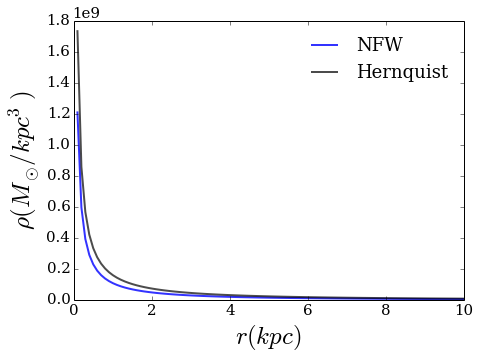

In [97]:
plt.figure(figsize=(7, 5))
rr = linspace(0, 10, 100)
plot(rr, rho_NFW(rs, rr, Mvir), lw=2, label='NFW', alpha=0.8)
plot(rr, Density_Hernquist(a, rr, Mh), lw=2, label='Hernquist', c='k', alpha=0.7)
legend(frameon = False)
xlabel("$r(kpc)$", fontsize=25)
ylabel(r"$\rho(M_{\odot}/kpc^3)$", fontsize=25)
savefig('../figures/hernquistNFW.png', bbox_inches='tight')